In [2]:
import pandas as pd
import numpy as np

# Data Cleaning

## Only Select Winter Season Data

In [3]:
df_rawdata1 = pd.read_csv('Chinese Thermal Comfort Dataset Class I.csv', encoding='GBK')
print("calss 1 records:", len(df_rawdata1))
df_rawdata2 = pd.read_csv('Chinese Thermal Comfort Dataset Class II.csv', encoding='GBK')
print("calss 2 records:", len(df_rawdata2))
df_rawdata3 = pd.read_csv('Chinese Thermal Comfort Dataset Class III.csv', encoding='GBK')
print("calss 3 records:", len(df_rawdata3))
# concatenate the three datasets
df_rawdata = pd.concat([df_rawdata1, df_rawdata2, df_rawdata3], ignore_index=True)
print("total records:", len(df_rawdata))
# only select A4.Season = heating season
df_heating = df_rawdata[df_rawdata['A4.Season'] == 'Winter Season']
print("total heating records:", len(df_heating))

calss 1 records: 7246
calss 2 records: 26184
calss 3 records: 8547
total records: 41977
total heating records: 15992


In [48]:
# check the A3.Data Contributor for rows that have A5.City == Baotou
df_baotou = df_heating[df_heating['A5.City'] == 'Henan Province,Jiaozuo City']
print("total Baotou records:", len(df_baotou))
print(df_baotou['A3.Data Contributor'].value_counts())
print(df_baotou['A4.Season'].value_counts())
print(df_baotou['B4.Building Operation Mode'].value_counts())


total Baotou records: 888
Xi’an University of Architecture and Technology    888
Name: A3.Data Contributor, dtype: int64
Winter Season    888
Name: A4.Season, dtype: int64
Radiator heating        887
Naturally Ventilated      1
Name: B4.Building Operation Mode, dtype: int64


In [49]:
df_heating.head()

,ID,A1.Code,A2.Date,A3.Data Contributor,A4.Season,A5.City,A6.Climate Zone,B1.Building Type,B2.Building Function,B3.Floors,...,F3.Radiant Temperature Asymmetry (℃),F4.PMV,F5.PPD,G1.Real-Time Outdoor Temperature (℃),G2.Mean Daily Outdoor Temperature (℃),G3.Monthly Mean Outdoor Temperature (℃),G4.7-Day Running Mean Outdoor Temperature (℃),G4.15-Day Running Mean Outdoor Temperature (℃),G5.Mean Daily Outdoor Relative Humidity (%),G6.Mean Daily Outdoor Air Velocity (m/s)
0,1,DLUT1st0172,1/30/19 10:35,Dalian University of Technology,Winter Season,"Hebei Province,Handan City",Cold zone,Residential,Bedroom,1.0,...,0.74,-0.58,12.01,NaN,-2.9,0.4,1.2,1.0,NaN,NaN
1,2,DLUT1st0173,1/30/19 10:42,Dalian University of Technology,Winter Season,"Hebei Province,Handan City",Cold zone,Residential,Bedroom,1.0,...,0.74,-0.10,5.19,NaN,-2.9,0.4,1.2,1.0,NaN,NaN
2,3,DLUT1st0174,1/30/19 10:45,Dalian University of Technology,Winter Season,"Hebei Province,Handan City",Cold zone,Residential,Bedroom,1.0,...,0.74,-0.66,14.14,NaN,-2.9,0.4,1.2,1.0,NaN,NaN
3,4,DLUT1st0175,1/30/19 10:47,Dalian University of Technology,Winter Season,"Hebei Province,Handan City",Cold zone,Residential,Bedroom,1.0,...,0.74,-0.36,7.78,NaN,-2.9,0.4,1.2,1.0,NaN,NaN
4,5,DLUT1st0176,1/31/19 20:20,Dalian University of Technology,Winter Season,"Hebei Province,Handan City",Cold zone,Residential,Bedroom,1.0,...,1.12,-0.82,19.45,NaN,0.6,0.4,0.5,0.2,NaN,NaN


In [50]:
df_rawdata.columns

Index(['ID', 'A1.Code', 'A2.Date', 'A3.Data Contributor', 'A4.Season',
       'A5.City', 'A6.Climate Zone', 'B1.Building Type',
       'B2.Building Function', 'B3.Floors', 'B4.Building Operation Mode',
       'B5.Room (Length×Width)', 'B5.Room Height (m)', 'C1.Sex', 'C2.Age',
       'C3.Height（cm）', 'C4.Weight（kg）', 'C5.Living Years', 'D1.TSV', 'D2.TCV',
       'D3.TAV', 'D5.Clothing Insulation (clo)', 'D6.Metabolic Rate (met)',
       'Measured Height (m)', 'E1.Indoor Air Temperature (℃)',
       'E2.Indoor Relative Humidity (%)', 'E3.Indoor Air Velocity (m/s)',
       'E4.Globe Temperature (℃)', 'E5.Roof Temperature (℃)',
       'E5.Wall Temperature (℃)', 'E5.Floor Temperature (℃)',
       'F1.Operative Temperature (℃)', 'F2.Mean Radiant Temperature (℃)',
       'F3.Radiant Temperature Asymmetry (℃)', 'F4.PMV', 'F5.PPD',
       'G1.Real-Time Outdoor Temperature (℃)',
       'G2.Mean Daily Outdoor Temperature (℃)',
       'G3.Monthly Mean Outdoor Temperature (℃)',
       'G4.7-Day Run

## Clearning City Names

In [51]:
df_heating['A5.City'].unique()

array(['Hebei Province,Handan City', 'Henan Province,Zhengzhou City',
       'Henan Province,Luoyang City', 'Tianjin City',
       'Liaoning Province,Dalian City',
       'Heilongjiang Province, Harbin City', 'Beijing',
       'Jiangsu Province,Changzhou City', 'Shanghai City',
       "Shaanxi Province,Xi'an City", 'Guangdong Province,Guangzhou City',
       'Beijing City', 'Baotou City', 'Turpan',
       'Hubei Province, Wuhan City', "Shaanxi Province, Xi'an City",
       'Hunan Province, Changsha City', 'Yunnan Province,Kunming City',
       'Lhasa City', 'Henan Province,Jiaozuo City',
       'Sichuan Province, Zigong City', 'Liaoning Province, Benxi City',
       'Henan Province, Nanyang City', 'Liaoning Province, Dalian City',
       'Hainan Province, Sanya City', 'Hunan Province, Hengyang City',
       'Shanxi Province, Lvliangfenyang City',
       'Henan Province, Pingdingshan City',
       'Yunnan Province, Kunming City', 'Shandong Province, Qingdao City',
       'Fujian Provinc

### Organizing city names in the same format (without comma and space)

In [52]:
df_heating = df_heating.copy()
# remove comma and replace space by _ in the A5.City strings
df_heating['A5.City'] = df_heating['A5.City'].str.replace(' ', '')
df_heating['A5.City'] = df_heating['A5.City'].str.replace(',', '')
# replace BeijingCity by Beijing
df_heating['A5.City'] = df_heating['A5.City'].str.replace('BeijingCity', 'Beijing')

In [53]:
df_heating['A5.City'].unique()

array(['HebeiProvinceHandanCity', 'HenanProvinceZhengzhouCity',
       'HenanProvinceLuoyangCity', 'TianjinCity',
       'LiaoningProvinceDalianCity', 'HeilongjiangProvinceHarbinCity',
       'Beijing', 'JiangsuProvinceChangzhouCity', 'ShanghaiCity',
       "ShaanxiProvinceXi'anCity", 'GuangdongProvinceGuangzhouCity',
       'BaotouCity', 'Turpan', 'HubeiProvinceWuhanCity',
       'HunanProvinceChangshaCity', 'YunnanProvinceKunmingCity',
       'LhasaCity', 'HenanProvinceJiaozuoCity',
       'SichuanProvinceZigongCity', 'LiaoningProvinceBenxiCity',
       'HenanProvinceNanyangCity', 'HainanProvinceSanyaCity',
       'HunanProvinceHengyangCity', 'ShanxiProvinceLvliangfenyangCity',
       'HenanProvincePingdingshanCity', 'ShandongProvinceQingdaoCity',
       'FujianProvinceZhenjiangCity', 'ShandongProvinceYantaiCity',
       'HohhotCity', 'FujianProvinceFuzhouCity',
       'ShandongProvinceXintaiCity', 'HenanProvinceKaifengCity',
       'FujianProvinceNanpingCity'], dtype=object)

### Add latitude and outdoor temperature (January) data for each city

In [54]:
city_dict_lat = {
     
    "HeilongjiangProvinceHarbinCity": 45.75,
    "Turpan": 42.94,
    "LiaoningProvinceBenxiCity": 41.29,
    "HohhotCity": 40.82,
    "BaotouCity": 40.65,
    "Beijing": 39.90,
    "TianjinCity": 39.12,  
    "LiaoningProvinceDalianCity": 38.92,
    "ShandongProvinceYantaiCity": 37.53,
    "ShanxiProvinceLvliangfenyangCity": 37.51, 
    "HebeiProvinceHandanCity": 36.62,
    "ShandongProvinceQingdaoCity": 36.07,
    "ShandongProvinceXintaiCity": 35.90, 
    "HenanProvinceJiaozuoCity": 35.24,
    "HenanProvinceKaifengCity": 34.79,
    "HenanProvinceZhengzhouCity": 34.75,
    "HenanProvinceLuoyangCity": 34.62,
    "ShaanxiProvinceXi'anCity": 34.26,
    "HenanProvincePingdingshanCity": 33.74,
    "HenanProvinceNanyangCity": 32.99,
    "FujianProvinceZhenjiangCity": 26.10,
    "JiangsuProvinceChangzhouCity": 31.78,  
    "ShanghaiCity": 31.23,
    "HubeiProvinceWuhanCity": 30.58,  
    "LhasaCity": 29.65,  
    "SichuanProvinceZigongCity": 29.34,
    "HunanProvinceChangshaCity": 28.23,
    "HunanProvinceHengyangCity": 26.89,
    "FujianProvinceNanpingCity": 26.64,  
    "FujianProvinceFuzhouCity": 26.08,
    "YunnanProvinceKunmingCity": 24.87, 
    "GuangdongProvinceGuangzhouCity": 23.13,  
    "HainanProvinceSanyaCity": 18.25,
}
# create a new column 'latitude' and in df_heating and assign the latitude value to corresponding city
df_heating['latitude'] = df_heating['A5.City'].map(city_dict_lat)

In [55]:
# mannual find the january (minimum?) monthly outdoor temperature for each city
city_t_out_min = {
    "HebeiProvinceHandanCity": -7.28,  
    "HenanProvinceZhengzhouCity": -5.6,  
    "TianjinCity": -10.97,  
    "LiaoningProvinceDalianCity": -13.44,  
    "HeilongjiangProvinceHarbinCity": -27.75,  
    "Beijing": -10.05,  
    "JiangsuProvinceChangzhouCity": -3,  # Estimated
    "ShanghaiCity": -2.16,  
    "ShaanxiProvinceXi'anCity": -6,  # Estimated
    "GuangdongProvinceGuangzhouCity": 4.98,  
    "BaotouCity": -18,  # Estimated
    "Turpan": -16.5,  
    "HubeiProvinceWuhanCity": -2.53,  
    "HunanProvinceChangshaCity": -1.8,  
    "YunnanProvinceKunmingCity": 0.95,
    "HenanProvinceLuoyangCity": 0.00,  # Estimated 
    "LhasaCity": -7.02,  
    "HenanProvinceJiaozuoCity": -5.05,  
    "SichuanProvinceZigongCity": 2.19,  
    "LiaoningProvinceBenxiCity": -21.73,  
    "HenanProvinceNanyangCity": -4.81,  
    "HainanProvinceSanyaCity": 13.22,  
    "HunanProvinceHengyangCity": -1.31,  
    "ShanxiProvinceLvliangfenyangCity": -12,  # Estimated
    "HenanProvincePingdingshanCity": -13.79,  
    "ShandongProvinceQingdaoCity": -7.78,  
    "ShandongProvinceYantaiCity": -5,  # Estimated
    "ShandongProvinceXintaiCity": -6,  # Estimated
    "FujianProvinceZhenjiangCity": 3,  # Estimated, assuming a typo and meant for a Fujian city
    "FujianProvinceNanpingCity": 2,  # Estimated
    "HohhotCity": -21.05,  
    "FujianProvinceFuzhouCity": 4.59,
    "HenanProvinceKaifengCity": -6.2,
}
# create a new column 't_out_min' and in df_heating and assign the value to corresponding city
df_heating['t_out_min'] = df_heating['A5.City'].map(city_t_out_min)

In [56]:
# remove "City" from the city names
df_heating['A5.City'] = df_heating['A5.City'].str.replace('City', '')
# remove "Province" from the city names
df_heating['A5.City'] = df_heating['A5.City'].str.replace('Province', '')
# check the unique city names
df_heating['A5.City'].unique()

array(['HebeiHandan', 'HenanZhengzhou', 'HenanLuoyang', 'Tianjin',
       'LiaoningDalian', 'HeilongjiangHarbin', 'Beijing',
       'JiangsuChangzhou', 'Shanghai', "ShaanxiXi'an",
       'GuangdongGuangzhou', 'Baotou', 'Turpan', 'HubeiWuhan',
       'HunanChangsha', 'YunnanKunming', 'Lhasa', 'HenanJiaozuo',
       'SichuanZigong', 'LiaoningBenxi', 'HenanNanyang', 'HainanSanya',
       'HunanHengyang', 'ShanxiLvliangfenyang', 'HenanPingdingshan',
       'ShandongQingdao', 'FujianZhenjiang', 'ShandongYantai', 'Hohhot',
       'FujianFuzhou', 'ShandongXintai', 'HenanKaifeng', 'FujianNanping'],
      dtype=object)

## Use ASHRAE Thermal Comfort Database2 naming conventions
https://github.com/ruijis/ashrae-db-II

cooling_type -> heating_type


In [57]:
df_heating.columns

Index(['ID', 'A1.Code', 'A2.Date', 'A3.Data Contributor', 'A4.Season',
       'A5.City', 'A6.Climate Zone', 'B1.Building Type',
       'B2.Building Function', 'B3.Floors', 'B4.Building Operation Mode',
       'B5.Room (Length×Width)', 'B5.Room Height (m)', 'C1.Sex', 'C2.Age',
       'C3.Height（cm）', 'C4.Weight（kg）', 'C5.Living Years', 'D1.TSV', 'D2.TCV',
       'D3.TAV', 'D5.Clothing Insulation (clo)', 'D6.Metabolic Rate (met)',
       'Measured Height (m)', 'E1.Indoor Air Temperature (℃)',
       'E2.Indoor Relative Humidity (%)', 'E3.Indoor Air Velocity (m/s)',
       'E4.Globe Temperature (℃)', 'E5.Roof Temperature (℃)',
       'E5.Wall Temperature (℃)', 'E5.Floor Temperature (℃)',
       'F1.Operative Temperature (℃)', 'F2.Mean Radiant Temperature (℃)',
       'F3.Radiant Temperature Asymmetry (℃)', 'F4.PMV', 'F5.PPD',
       'G1.Real-Time Outdoor Temperature (℃)',
       'G2.Mean Daily Outdoor Temperature (℃)',
       'G3.Monthly Mean Outdoor Temperature (℃)',
       'G4.7-Day Run

In [58]:
# rename general information
df_heating = df_heating.rename(columns={'ID': 'suject_id'})
df_heating = df_heating.rename(columns={'A2.Date': 'timestamp'})
df_heating = df_heating.rename(columns={'A3.Data Contributor': 'contributor'})
df_heating = df_heating.rename(columns={'A4.Season': 'season'})
df_heating = df_heating.rename(columns={'A5.City': 'city'})
df_heating = df_heating.rename(columns={'A6.Climate Zone': 'climate'})
df_heating = df_heating.rename(columns={'B1.Building Type': 'building_type'})
df_heating = df_heating.rename(columns={'B4.Building Operation Mode': 'heating_type'})
# rename personal conditions
df_heating = df_heating.rename(columns={'C1.Sex': 'gender'})
df_heating = df_heating.rename(columns={'C2.Age': 'age'})
df_heating = df_heating.rename(columns={'C3.Height（cm）': 'ht'})
df_heating = df_heating.rename(columns={'C4.Weight（kg）': 'wt'})
df_heating = df_heating.rename(columns={'D1.TSV': 'thermal_sensation'})
df_heating = df_heating.rename(columns={'D2.TCV': 'thermal_comfort'})
df_heating = df_heating.rename(columns={'D3.TAV': 'thermal_acceptability'})
df_heating = df_heating.rename(columns={'D5.Clothing Insulation (clo)': 'clo'})
df_heating = df_heating.rename(columns={'D6.Metabolic Rate (met)': 'met'})
# rename  indoor environment parameters
df_heating = df_heating.rename(columns={'E1.Indoor Air Temperature (℃)': 'ta'})
df_heating = df_heating.rename(columns={'E2.Indoor Relative Humidity (%)': 'rh'})
df_heating = df_heating.rename(columns={'E3.Indoor Air Velocity (m/s)': 'vel'})
df_heating = df_heating.rename(columns={'E4.Globe Temperature (℃)': 'tg'})
df_heating = df_heating.rename(columns={'F1.Operative Temperature (℃)': 'top'})
df_heating = df_heating.rename(columns={'F2.Mean Radiant Temperature (℃)': 'tr'})
# rename outdoor temperature parameters
df_heating = df_heating.rename(columns={'G1.Real-Time Outdoor Temperature (℃)': 't_out_realtime'})
df_heating = df_heating.rename(columns={'G2.Mean Daily Outdoor Temperature (℃)': 't_out_daily'})
df_heating = df_heating.rename(columns={'G3.Monthly Mean Outdoor Temperature (℃)': 't_out_monthly'})
df_heating = df_heating.rename(columns={'G4.7-Day Running Mean Outdoor Temperature (℃)': 't_out_7'})
df_heating = df_heating.rename(columns={'G4.15-Day Running Mean Outdoor Temperature (℃)': 't_out_15'})

# rename
df_heating = df_heating.rename(columns={'G5.Mean Daily Outdoor Relative Humidity (%)': 'rh_out'})




## Check the Datatypes

In [59]:
# select a sbuset of columns
df_heating_1 = df_heating[['suject_id', 
                            'timestamp', 
                            'season', 
                            'city', 
                            'climate', 
                            'building_type', 
                            'heating_type', 
                            'gender', 
                            'age', 
                            'ht', 
                            'wt', 
                            'thermal_sensation', 
                            'thermal_comfort', 
                            'thermal_acceptability', 
                            'clo', 
                            'met', 
                            'ta', 
                            'rh', 
                            'vel', 
                            'tg', 
                            'top', 
                            'tr', 
                            't_out_min', 
                            't_out_monthly', 
                            'latitude']]
print(df_heating_1.shape)
df_heating_1.dtypes

(15992, 25)


suject_id                  int64
timestamp                 object
season                    object
city                      object
climate                   object
building_type             object
heating_type              object
gender                    object
age                       object
ht                       float64
wt                       float64
thermal_sensation        float64
thermal_comfort          float64
thermal_acceptability    float64
clo                      float64
met                      float64
ta                       float64
rh                         int64
vel                      float64
tg                       float64
top                      float64
tr                       float64
t_out_min                float64
t_out_monthly            float64
latitude                 float64
dtype: object

In [60]:
df_heating_1['rh'] = df_heating['rh'].astype(float)

/var/folders/v0/03v41tbn7072cjr0b3ddfgjw0000gn/T/ipykernel_67386/2292325144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heating_1['rh'] = df_heating['rh'].astype(float)


['18-30' '41-50' '51-60' '31-40' '＞60' nan '17' '20' '18' '19' '21' '22'
 '23' '24' '16' '≥61' '17-Sep' '31' '28' '36' '27' '34' '32' '51' '26'
 '30' '29' '25' '33' '35' '38' '42' '40' '39' '44' '43' '48' '41' '49'
 '57' '37' '50' '52' '55' '82' '56' '65' '63' '60' '61' '68' '72' '71'
 '67' '14' '66' '45' '70' '62' '58' '78' '80' '64' '79' '69' '46' '54'
 '59' '53' '30-40' ' ' '83' '77' '74' '76' '9' '47' '13' '10' '75' '15'
 '7' '73' '12' '92' '11' '4' '8' '85']


<AxesSubplot:>

/Users/ruijisun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 65310 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ruijisun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 65310 missing from current font.
  font.set_text(s, 0, flags=flags)


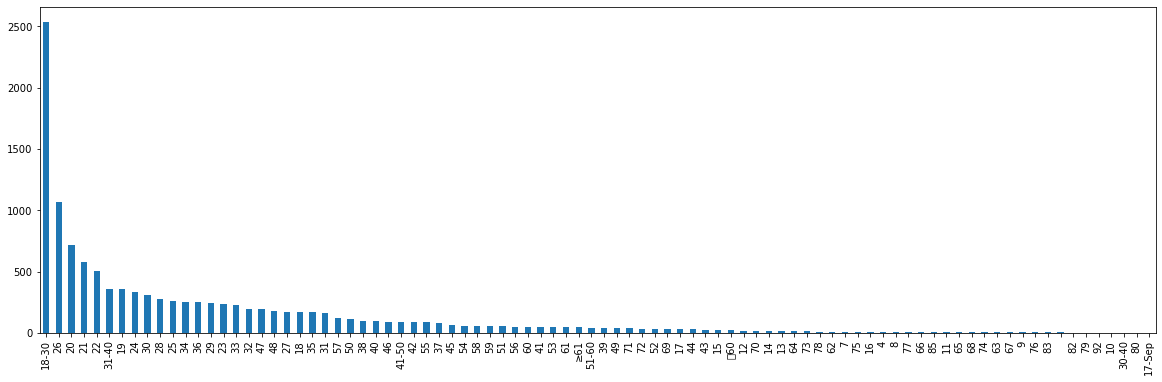

In [61]:
# print unique values of age
print(df_heating_1['age'].unique())
# increase the graph size
df_heating_1['age'].value_counts().plot(kind='bar', figsize=(20, 6))

['18-30', '40-50', '50-60', '30-40', '60+', NaN, '0-18']
Categories (6, object): ['0-18' < '18-30' < '30-40' < '40-50' < '50-60' < '60+']


<AxesSubplot:>

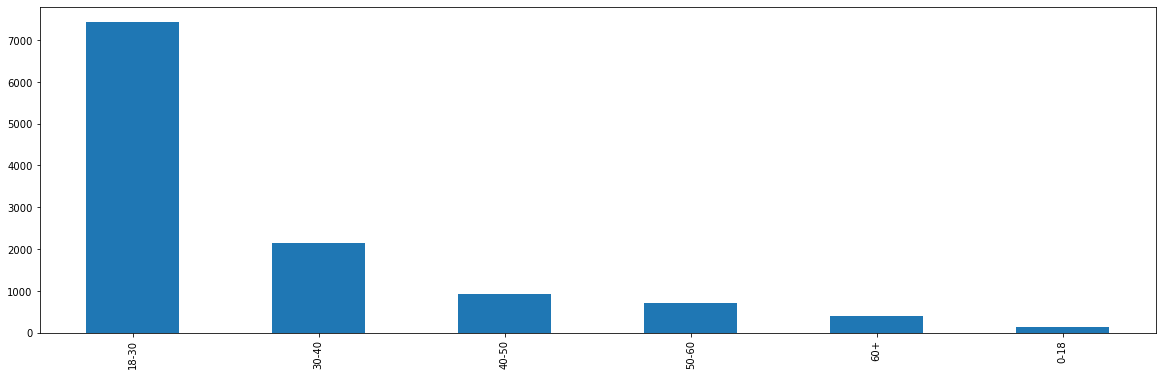

In [62]:
df_heating_2 = df_heating_1.copy()

# Define the age bins and labels
bins = [0, 18, 30, 40, 50, 60, 100]  # Adjust the upper limit as needed
labels = ['0-18', '18-30', '30-40', '40-50', '50-60', '60+']

# Function to handle age ranges and single ages
def convert_age(age):
    if pd.isna(age) or age.strip() == '':
        return np.nan
    if '-' in age:
        return int(age.split('-')[0])+5
    if '＞' in age or '≥' in age:
        return 65
    else:
        return int(age)
    
# Apply the conversion function
df_heating_2['age'] = df_heating_1['age'].apply(convert_age)

# Convert age values to categorical data
df_heating_2['age_group'] = pd.cut(df_heating_2['age'], bins=bins, labels=labels, right=False)

# Print unique values of age_group
print(df_heating_2['age_group'].unique())

# Plot the age_group distribution
df_heating_2['age_group'].value_counts().plot(kind='bar', figsize=(20, 6))

In [63]:
df_heating_2.dtypes

suject_id                   int64
timestamp                  object
season                     object
city                       object
climate                    object
building_type              object
heating_type               object
gender                     object
age                       float64
ht                        float64
wt                        float64
thermal_sensation         float64
thermal_comfort           float64
thermal_acceptability     float64
clo                       float64
met                       float64
ta                        float64
rh                        float64
vel                       float64
tg                        float64
top                       float64
tr                        float64
t_out_min                 float64
t_out_monthly             float64
latitude                  float64
age_group                category
dtype: object

['Radiator heating' 'Convection heating' 'Radiant floor heating'
 'Naturally Ventilated' 'Ceiling capillary heating'
 'Air conditioning heating' 'Others' 'self-heating' 'Furnace heating'
 'Floor radiation + fan coil' 'Small electric heater heating']


<AxesSubplot:>

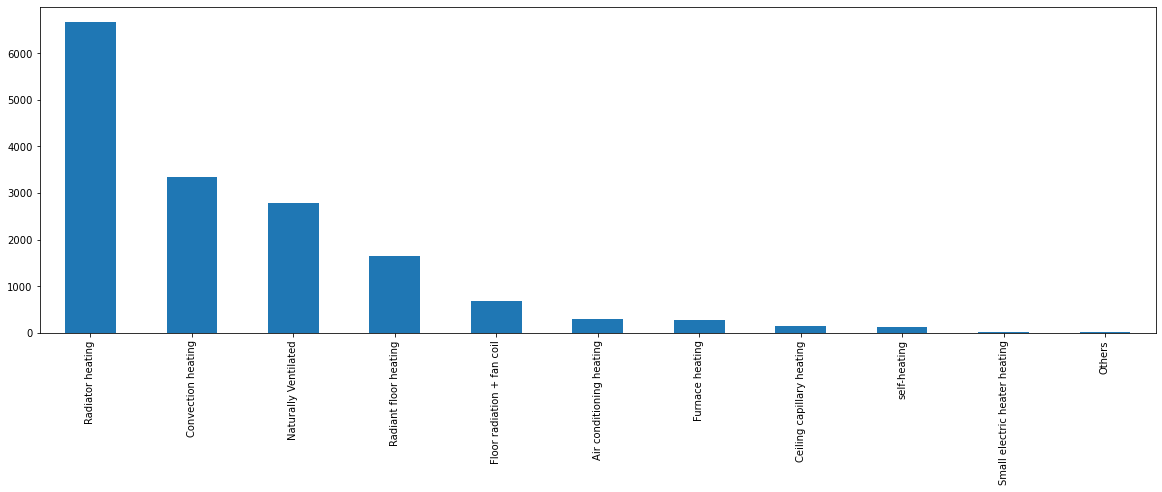

In [64]:
# unique values of heating_type
print(df_heating_2['heating_type'].unique())
# check the heating_type distribution
df_heating_2['heating_type'].value_counts().plot(kind='bar', figsize=(20, 6))

In [65]:
# check Xi'an building type unique values
print(df_heating_2[df_heating_2['city'] == "ShaanxiXi'an"]['building_type'].unique())

['Office']


## Calcualte SET


In [66]:
df_heating_2

,suject_id,timestamp,season,city,climate,building_type,heating_type,gender,age,ht,...,ta,rh,vel,tg,top,tr,t_out_min,t_out_monthly,latitude,age_group
0,1,1/30/19 10:35,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Female,23.0,170.0,...,21.5,32.0,0.0,20.9,20.8,20.9,-7.28,0.4,36.62,18-30
1,2,1/30/19 10:42,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Female,46.0,168.0,...,21.5,32.0,0.0,20.9,20.8,20.9,-7.28,0.4,36.62,40-50
2,3,1/30/19 10:45,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Male,46.0,170.0,...,21.5,32.0,0.0,20.9,20.8,20.9,-7.28,0.4,36.62,40-50
3,4,1/30/19 10:47,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Male,23.0,178.0,...,21.5,32.0,0.0,20.9,20.8,20.9,-7.28,0.4,36.62,18-30
4,5,1/31/19 20:20,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Male,23.0,174.0,...,20.9,33.0,0.0,19.8,20.0,19.8,-7.28,0.4,36.62,18-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41972,8543,4/21/21 11:08,Winter Season,Shanghai,Hot summer and cold winter zone,Office,Naturally Ventilated,NaN,NaN,NaN,...,25.3,52.0,0.0,25.3,25.3,25.3,-2.16,NaN,31.23,NaN
41973,8544,4/21/21 11:11,Winter Season,Shanghai,Hot summer and cold winter zone,Office,Convection heating,NaN,NaN,NaN,...,25.3,52.0,0.0,25.3,25.3,25.3,-2.16,NaN,31.23,NaN
41974,8545,4/21/21 16:31,Winter Season,Shanghai,Hot summer and cold winter zone,Office,Naturally Ventilated,NaN,NaN,NaN,...,25.8,52.0,0.0,25.8,25.8,25.8,-2.16,NaN,31.23,NaN
41975,8546,4/21/21 16:32,Winter Season,Shanghai,Hot summer and cold winter zone,Office,Naturally Ventilated,NaN,NaN,NaN,...,26.2,52.0,0.0,26.2,26.2,26.2,-2.16,NaN,31.23,NaN


## Export CSV

In [67]:
df_heating_2.to_csv('CN_DB.csv', index=False)